<a href="https://colab.research.google.com/github/sanyamjain789523/personalProjects/blob/main/MLProjClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(r'IRAhandle_tweets_2.csv')

In [ ]:
df.head()

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,...,account_type,retweet,account_category,new_june_2018,alt_external_id,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1
0,2497991305,AUSTINLOVESBEER,NHS fails to treat one in six cancer patients ...,United States,English,3/8/2017 9:00,3/8/2017 9:00,41,34,176,...,Right,1,RightTroll,0,2497991305,839400338515881984,http://twitter.com/2497991305/statuses/8394003...,http://trib.al/hBZijWg,NaN,NaN
1,2497991305,AUSTINLOVESBEER,Real reason Alexis Sanchez walked out of Arsen...,United States,English,3/8/2017 9:00,3/8/2017 9:00,41,34,180,...,Right,1,RightTroll,0,2497991305,839400484326690817,http://twitter.com/2497991305/statuses/8394004...,https://twitter.com/SunSport/status/8393826823...,http://thesun.uk/60148X0Di,NaN
2,2497991305,AUSTINLOVESBEER,George Michael cause of death revealed: What i...,United States,English,3/8/2017 9:00,3/8/2017 9:00,41,34,177,...,Right,1,RightTroll,0,2497991305,839400379238379520,http://twitter.com/2497991305/statuses/8394003...,https://twitter.com/Daily_Star/status/83938393...,http://bit.ly/2mewcAw,NaN
3,2497991305,AUSTINLOVESBEER,Russian TV crew 'offer Swedish teenagers money...,United States,English,3/8/2017 9:00,3/8/2017 9:00,41,34,178,...,Right,1,RightTroll,0,2497991305,839400406463631360,http://twitter.com/2497991305/statuses/8394004...,http://ind.pn/2lXx9w2,NaN,NaN
4,2497991305,AUSTINLOVESBEER,Donald Trump met Russian ambassador during ele...,United States,English,3/8/2017 9:00,3/8/2017 9:00,41,34,179,...,Right,1,RightTroll,0,2497991305,839400447295160321,http://twitter.com/2497991305/statuses/8394004...,http://ind.pn/2lCVb3r,NaN,NaN


In [ ]:
dfRegionDict = df.region.value_counts().reset_index().set_index('index').T.to_dict('list')

In [ ]:
df['content'] = df['content'].apply(lambda x: x.replace("https",""))

In [ ]:
df["regionCount"] = df.region.map(dfRegionDict)

In [ ]:
dfRegionDict

{'United States': [167531],
 'Unknown': [66752],
 'Azerbaijan': [6075],
 'Malaysia': [4932],
 'Germany': [2185],
 'Russian Federation': [1267],
 'United Arab Emirates': [1148],
 'France': [56],
 'Belarus': [26],
 'Japan': [11],
 'Egypt': [9],
 'Hong Kong': [3],
 'Italy': [2],
 'Austria': [1]}

In [ ]:
df = df.dropna()

In [ ]:
df["regionCount"] = df["regionCount"].apply(lambda x:x[0])

In [ ]:
df = df[df.regionCount > 1000]

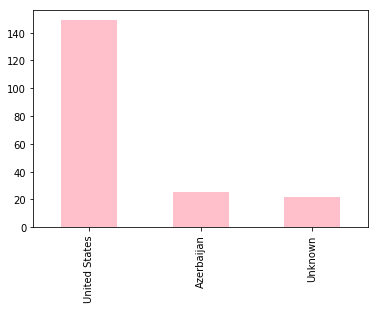

In [ ]:
df['region'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

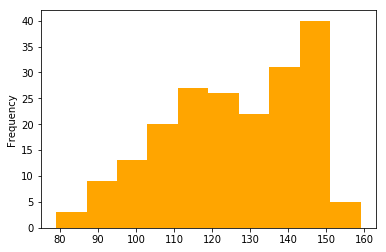

In [ ]:
length_test = df['content'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

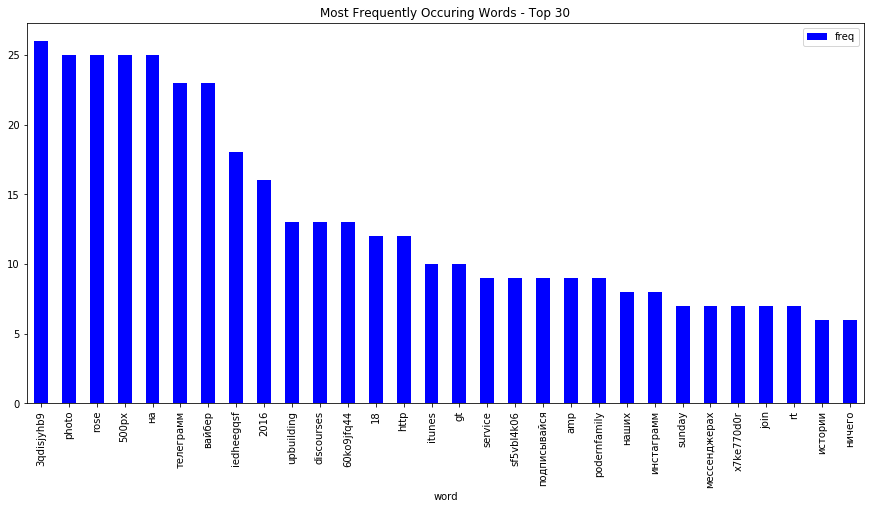

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.content)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

In [ ]:
pd.set_option("display.max_columns",100)
df.head(2)

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,retweet,account_category,new_june_2018,alt_external_id,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1,regionCount
3344,2396703045,BABICHEVASONYA,Представляем новую коллекция одежды ➡ ://t.co/...,United States,Russian,12/1/2015 6:56,12/1/2015 6:56,215,234,2521,RETWEET,Russian,1,NonEnglish,1,2396703045,671583637599559681,http://twitter.com/babichevaSonya/statuses/671...,https://twitter.com/RussiansForward/status/671...,http://rus.myprintbar.ru/svoy-diza,http://rus.myprintbar.ru,167531
4374,2532835560,BABYJANNYMEOW,John 8: The Adulterous Woman \| Upbuilding Dis...,United States,English,11/21/2016 16:15,11/21/2016 16:16,3239,3326,4583,RETWEET,Hashtager,1,HashtagGamer,1,2532835560,800734285892292608,http://twitter.com/2532835560/statuses/8007342...,https://twitter.com/Gamiliell/status/800721508...,https://500px.com/gamilliell,http://gamiliel.com/2012/06/05/john-8-the-adul...,167531


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["regionLabel"] = le.fit_transform(df.region)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.content).toarray()
labels = df.regionLabel
features.shape

(196, 62)

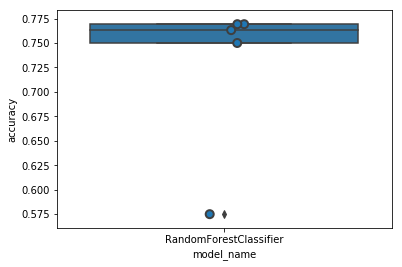

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
#     LinearSVC(),
#     MultinomialNB(),
#     LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [ ]:
cv_df.groupby('model_name').accuracy.mean()

model_name
RandomForestClassifier    0.725324
Name: accuracy, dtype: float64

In [ ]:
model = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)
model.fit(features, labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [ ]:
model.predict([features[100]])

array([1])